In [16]:
import pandas as pd
import seaborn  as sns
import matplotlib.pylab as plt

In [11]:
loans_income = pd.read_csv('data/loans_income.csv', squeeze=True)

### 중심 극한 정리

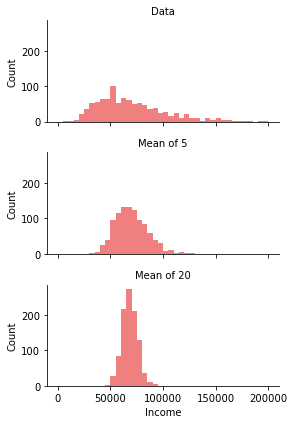

In [21]:

sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col = 'type', col_wrap=1, height = 2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40 , color= 'lightcoral')
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.show()

### 부트 스트랩

In [24]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
    
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -66.75050000000192
std. error: 199.64867290403566


### 